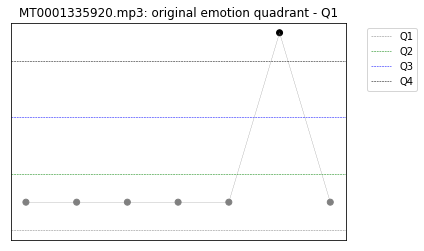

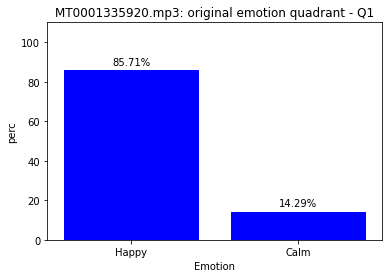

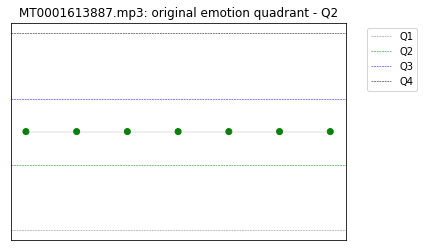

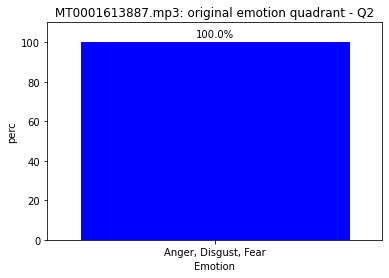

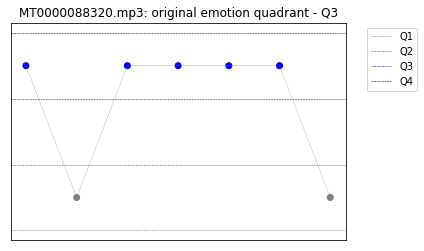

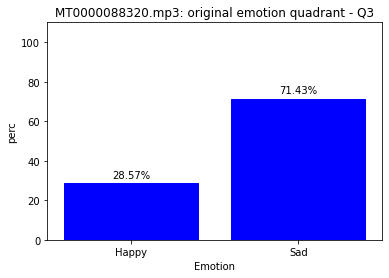

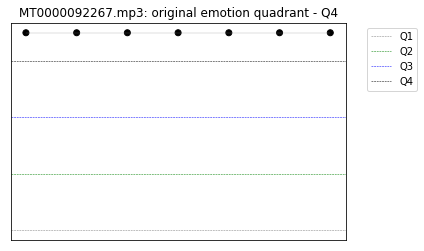

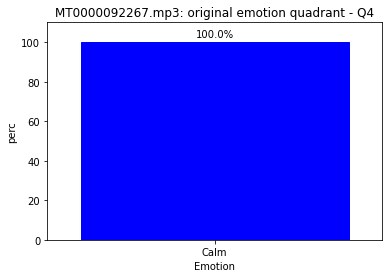

In [8]:
import os
import pandas as pd

# storing the model
import pickle

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set file paths
root_path = "D:/PhD Program/Final Research/Dissertation/Data/Model Datasets/"
data_file_path = root_path + "DS_1_All_Feature_5_sec_nMFCC_nht_ns_yat.csv"
os.chdir(root_path)

files_to_choose = ['MT0001335920.mp3','MT0001613887.mp3','MT0000088320.mp3','MT0000092267.mp3']
data_df_raw = pd.read_csv(data_file_path)
# choose a single file
cols_to_choose = ['spect_centroid_median', 'loudness_mean', 'spect_rolloff_mean', 'f0_mean', 'mel_57_median', 'mel_60_median',
 'spect_contrast_median', 'f0_max', 'power_median', 'mel_3_mean', 'power_iqr', 'mel_4_sd', 'mel_45_median', 'power_mean', 'f0_median', 'mel_14_min', 'power_max', 'mel_2_max', 'mel_48_median', 'zcr_median', 'mel_1_max',
 'mel_4_median', 'spect_rolloff_median', 'spect_contrast_mean', 'zcr_iqr', 'mel_2_iqr', 'spect_centroid_max',
 'rms_max', 'mel_4_max', 'mel_0_sd', 'mel_0_iqr', 'spect_centroid_min', 'mel_1_median', 'power_sd',
 'spect_contrast_min', 'mel_3_sd', 'mel_0_median', 'mel_60_min', 'spect_rolloff_sd', 'zcr_mean', 'mel_23_median',
 'spect_rolloff_iqr', 'mel_2_sd', 'spect_bw_median', 'mel_6_max', 'spect_rolloff_max', 'spect_contrast_sd',
 'spect_centroid_sd', 'mel_61_median', 'mel_40_iqr', 'mel_3_iqr', 'spect_bw_max', 'mel_0_max', 'spect_bw_min',
 'zcr_sd', 'mel_61_iqr', 'mel_54_median', 'mel_4_mean', 'mel_8_min', 'mel_5_min', 'zcr_max', 'mel_38_iqr', 'mel_56_median', 'mel_5_max', 'spect_centroid_mean', 'mel_45_iqr', 'mel_7_iqr', 'mel_1_iqr', 'mel_13_min',
 'mel_40_median', 'mel_2_median', 'mel_59_median', 'mel_46_median', 'mel_8_median', 'mel_9_iqr', 'spect_bw_mean',
 'spect_bw_sd', 'mel_11_median', 'mel_6_sd', 'plp_mean', 'mel_7_min', 'mel_42_median', 'mel_12_min', 'mel_1_mean',
 'mel_39_median', 'mel_34_min', 'mel_11_mean', 'spect_contrast_iqr', 'mel_7_max', 'mel_53_median']


# load the model
ab_model_4_class = pickle.load(open(root_path+"AB_final_model_4_classes.md5",'rb'))

# make predictions
for file_name in files_to_choose:
    mean_vals =[]
    color_vals = []
    q_vals = []    
    data_df_test = data_df_raw[data_df_raw.sound_file_name == file_name]  
    orig_class = ''.join(set(data_df_test.sound_file_class))
    data_df_test = data_df_test[cols_to_choose]
    y_pred_model = ab_model_4_class.predict(data_df_test)
    y_pred_model_prob = ab_model_4_class.predict_proba(data_df_test)
    
    for pred_val in y_pred_model:

        if pred_val == 1:
            mean_val = 0.375
            color_val = 'green'
            q_val = 'Q2'            
        elif pred_val == 2:
            mean_val = 0.625
            color_val = 'blue'
            q_val = 'Q3'            
        elif pred_val == 3:
            mean_val = 0.875
            color_val = 'black'
            q_val = 'Q4'
        else:
            color_val = 'gray'
            q_val = 'Q1'        
            mean_val = 0.125
            
        mean_vals.append(mean_val)
        q_vals.append(q_val)
        color_vals.append(color_val)
        
    emotion_df = pd.DataFrame({'mer_val':mean_vals,
                               'quad_val':q_vals,
                              'color_code':color_vals})  
    # plot predictions
    x = [i for i in range(0,len(mean_vals))]
    plt.plot(x,mean_vals, color = 'gray', linewidth=0.25)
    plt.scatter(x,mean_vals, c=color_vals)
    plt.axhline(y=0, c='gray', linestyle='--',  linewidth=0.5, label='Q1')
    plt.axhline(y=0.25, c='green', linestyle='--',  linewidth=0.5, label='Q2')
    plt.axhline(y=0.5, c='blue', linestyle='--',  linewidth=0.5, label='Q3')
    plt.axhline(y=0.75, c='black', linestyle='--',  linewidth=0.5, label='Q4')
    plt.title(file_name+": original emotion quadrant - "+orig_class)
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
    plt.show()
        
    emotion_df_grp = pd.DataFrame(emotion_df.groupby(['color_code'])['mer_val'].count()).reset_index()
    emotion_df_grp['perc'] = round((emotion_df_grp['mer_val']/sum(emotion_df_grp['mer_val']))*100,2)
    emotion_df_grp['Emotion Quadrant'] = emotion_df_grp.apply(lambda x: 'Q4' if x.color_code == 'black' 
                                                              else ('Q2' if x.color_code == 'green' 
                                                                    else ('Q3' if x.color_code == 'blue' else 'Q1')), axis=1)

    emotion_df_grp['Emotion'] = emotion_df_grp.apply(lambda x: 'Calm' if x.color_code == 'black' 
                                                          else ('Anger, Disgust, Fear' if x.color_code == 'green' 
                                                                else ('Sad' if x.color_code == 'blue' else 'Happy')), axis=1)

    emotion_df_grp.sort_values(by=['Emotion Quadrant'], inplace=True)

    sns_plot = sns.barplot(x="Emotion", y="perc", data=emotion_df_grp)
    for bar in sns_plot.patches:
        sns_plot.annotate(str(bar.get_height())+"%",
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
        bar.set_color('blue')
    plt.title(file_name+": original emotion quadrant - "+orig_class)
    plt.ylim(0,110)
    plt.show()
